In [1]:
import numpy as np
import theano
import pickle
import matplotlib.pyplot as plt
import numpy.linalg as la
%matplotlib inline
%precision 3

def load(name):
    with open(name, 'rb') as f:
        d = pickle.load(f)
    return d

def plotaux(d):
    aux_wts = d['allwts'][-1][2]
    plt.plot(aux_wts[0], aux_wts[1], 'ro')
    print (d['allwts'][-1][3])
         
def print_layers(dump):
    layers = dump['layers']
    allwts = dump['allwts']
    for namedic, wb in zip(layers, allwts):
        name, dic = namedic
        print("################")
        print(name, ":", end="\n\t")
        for field, val in sorted(dic.items(), key=lambda x:x[0]):
            print(field, ":", val, end='\n\t')
        print()
        for i, w in enumerate(wb):
            print("\t W{}) f{} {}".format(i, str(w.dtype)[-2:], w.shape))

def print_norms(dump):
    allwts = dump['allwts']
    for layer, wb in enumerate(allwts):
        print("Layer :", layer)
        for iw, w in enumerate(wb):
            if w.ndim == 2:
                norms = la.norm(w, axis=0)
                print(iw, norms.shape)
                print(norms)
                #print((100*norms).astype(int))
            

In [7]:
linesonly = load('aux_only34174_96.pkl')
basic = load('0all555555_01.pkl')
softaux = load('cnn_3softaux640038_02.pkl')

In [8]:
print_layers(linesonly)

################
InputLayer :
	img_sz : 1
	
################
HiddenLayer :
	n_out : 1
	
	 W0) f32 (1, 1)
	 W1) f32 (1,)
################
SoftAuxLayer :
	aux_type : LocationInfo
	n_aux : (5, 9)
	n_out : 457
	reg : {'momentum': 0, 'maxnorm': 0}
	
	 W0) f32 (1, 457)
	 W1) f32 (457,)
	 W2) f32 (2, 5)
	 W3) f32 (5,)
	 W4) f32 (5, 9)
	 W5) f32 (9,)
	 W6) f32 (9, 457)
	 W7) f32 (457,)


In [9]:
print_layers(basic)

################
ElasticLayer :
	angle : 5
	img_sz : 48
	invert_image : True
	magnitude : 60
	nearest : True
	pflip : 0.03
	sigma : 15
	translation : 2
	zoom : 1.1
	
################
ConvPoolLayer :
	actvn : relu50
	filter_sz : 3
	num_maps : 8
	pool_sz : 2
	stride : 1
	
	 W0) f32 (8, 1, 3, 3)
	 W1) f32 (8,)
################
ConvPoolLayer :
	actvn : relu20
	filter_sz : 3
	num_maps : 24
	pool_sz : 2
	stride : 1
	
	 W0) f32 (24, 8, 3, 3)
	 W1) f32 (24,)
################
ConvPoolLayer :
	actvn : relu10
	filter_sz : 3
	num_maps : 72
	pool_sz : 2
	stride : 1
	
	 W0) f32 (72, 24, 3, 3)
	 W1) f32 (72,)
################
HiddenLayer :
	actvn : relu05
	n_out : 500
	pdrop : 0.5
	reg : {'L2': 0.001, 'maxnorm': 0}
	
	 W0) f32 (1800, 500)
	 W1) f32 (500,)
################
SoftmaxLayer :
	n_out : 457
	reg : {'L2': 0.001, 'maxnorm': 0}
	
	 W0) f32 (500, 457)
	 W1) f32 (457,)


In [11]:
print_layers(softaux)

################
ElasticLayer :
	img_sz : 48
	invert_image : True
	magnitude : 60
	nearest : True
	pflip : 0.05
	sigma : 15
	translation : 2
	zoom : 1.1
	
################
ConvPoolLayer :
	actvn : relu50
	filter_sz : 3
	num_maps : 8
	pool_sz : 2
	stride : 1
	
	 W0) f32 (8, 1, 3, 3)
	 W1) f32 (8,)
################
ConvPoolLayer :
	actvn : relu20
	filter_sz : 3
	num_maps : 24
	pool_sz : 2
	stride : 1
	
	 W0) f32 (24, 8, 3, 3)
	 W1) f32 (24,)
################
ConvPoolLayer :
	actvn : relu10
	filter_sz : 3
	num_maps : 72
	pool_sz : 2
	stride : 1
	
	 W0) f32 (72, 24, 3, 3)
	 W1) f32 (72,)
################
HiddenLayer :
	actvn : relu05
	n_out : 500
	pdrop : 0.5
	reg : {'L2': 0.001, 'maxnorm': 0}
	
	 W0) f32 (1800, 500)
	 W1) f32 (500,)
################
SoftAuxLayer :
	aux_type : LocationInfo
	n_aux : (4, 7)
	n_out : 457
	reg : {'L2': 0.001, 'maxnorm': 0}
	
	 W0) f32 (500, 457)
	 W1) f32 (457,)
	 W2) f32 (2, 4)
	 W3) f32 (4,)
	 W4) f32 (4, 7)
	 W5) f32 (7,)
	 W6) f32 (7, 457)
	 W7) f32 (457,)

[ 0.048  0.027  0.032  0.034]


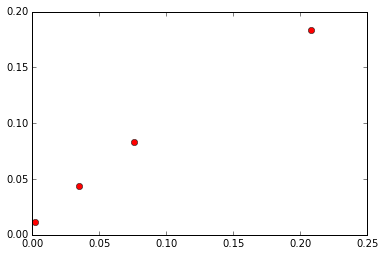

[ 4.526 -1.128  0.232  0.112  1.636]


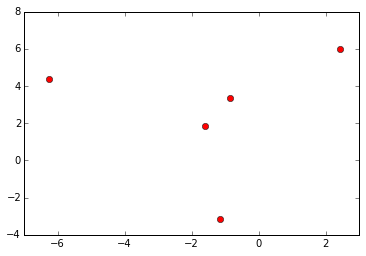

In [12]:
plotaux(softaux)
plt.show()
plotaux(linesonly)


In [13]:
# Copy Lines info
softaux['allwts'][-1][2:] = linesonly['allwts'][-1][2:]
softaux['layers'][-1][1]['n_aux'] = linesonly['layers'][-1][1]['n_aux']

# Copy from basic
for tgt, src in zip(softaux['allwts'][:-1], basic['allwts'][:-1]):
    tgt[:] = src[:]
    
softaux['allwts'][-1][:2] = basic['allwts'][-1][:2]
softaux['layers'][-1][1]['reg']['rate'] = 4
softaux['layers'][-2][1]['reg']['rate'] = 2


In [14]:
print_layers(softaux)

################
ElasticLayer :
	img_sz : 48
	invert_image : True
	magnitude : 60
	nearest : True
	pflip : 0.05
	sigma : 15
	translation : 2
	zoom : 1.1
	
################
ConvPoolLayer :
	actvn : relu50
	filter_sz : 3
	num_maps : 8
	pool_sz : 2
	stride : 1
	
	 W0) f32 (8, 1, 3, 3)
	 W1) f32 (8,)
################
ConvPoolLayer :
	actvn : relu20
	filter_sz : 3
	num_maps : 24
	pool_sz : 2
	stride : 1
	
	 W0) f32 (24, 8, 3, 3)
	 W1) f32 (24,)
################
ConvPoolLayer :
	actvn : relu10
	filter_sz : 3
	num_maps : 72
	pool_sz : 2
	stride : 1
	
	 W0) f32 (72, 24, 3, 3)
	 W1) f32 (72,)
################
HiddenLayer :
	actvn : relu05
	n_out : 500
	pdrop : 0.5
	reg : {'rate': 2, 'L2': 0.001, 'maxnorm': 0}
	
	 W0) f32 (1800, 500)
	 W1) f32 (500,)
################
SoftAuxLayer :
	aux_type : LocationInfo
	n_aux : (5, 9)
	n_out : 457
	reg : {'rate': 4, 'L2': 0.001, 'maxnorm': 0}
	
	 W0) f32 (500, 457)
	 W1) f32 (457,)
	 W2) f32 (2, 5)
	 W3) f32 (5,)
	 W4) f32 (5, 9)
	 W5) f32 (9,)
	 W6) f32 (9,

In [22]:
softaux['training_params']['NUM_EPOCHS'] = 41
softaux['training_params']['SEED'] = 555555
softaux['training_params']['CUR_EPOCH'] = 100
softaux['training_params']


{'BATCH_SZ': 20,
 'CUR_EPOCH': 100,
 'EPOCHS_TO_HALF_RATE': 1,
 'EPOCHS_TO_TEST': 1,
 'INIT_LEARNING_RATE': 0.100,
 'NUM_EPOCHS': 41,
 'SEED': 555555,
 'TEST_SAMP_SZ': 5000,
 'TRAIN_ON_FRACTION': 0.750}

dict_keys(['allwts', 'layers', 'training_params'])

In [23]:
## Checks
print("Basic")
for s, t in zip(softaux['allwts'], basic['allwts']):
    print("#########")
    for ss, tt in zip(s, t):
        print("#", (ss != tt).sum())

print("Lines only")
for s, t in zip(reversed(softaux['allwts']), reversed(linesonly['allwts'])):
    print("#########")
    for ss, tt in zip(s, t):
        print("#", (ss != tt).sum())


Basic
#########
#########
# 0
# 0
#########
# 0
# 0
#########
# 0
# 0
#########
# 0
# 0
#########
# 0
# 0
Lines only
#########
# 228500
# 457
# 0
# 0
# 0
# 0
# 0
# 0
#########
# 900000
# 500
#########


In [25]:
#Augument last AuxCross values
print((softaux['allwts'][-1][-2]).shape, (softaux['allwts'][-1][-1]).shape)

for i in range(4):
    name = "merged_{}.pkl".format(2**i)
    print(name)
    with open(name, 'wb') as f:
        pickle.dump(softaux, f, -1)
    softaux['allwts'][-1][-2] *= 2
    softaux['allwts'][-1][-1] *= 2 

(9, 457) (457,)
merged_1.pkl
merged_2.pkl
merged_4.pkl
merged_8.pkl
